<a href="https://colab.research.google.com/github/dvstar22/data_analysis/blob/main/5_probability_and_statistics_ab_testing_proportions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mde = 0.05
baseline = 0.2
sample_size = 1030

Fisher exact test  
Z test == Chi square test   
T test   
Bootstrap (Monte-Carlo)  

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Н0: разницы между группами нет == выборки пришли из одного распределения

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

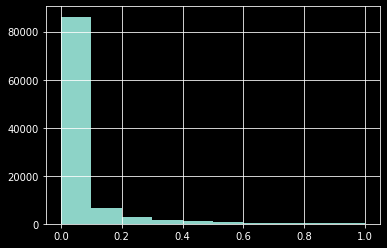

In [ ]:
t.hist()

In [ ]:
(t < 0.05).mean()

0.77917

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.7803

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.8556

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

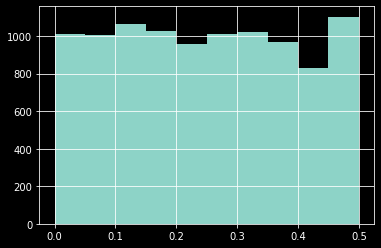

In [ ]:
t.hist()

In [ ]:
import seaborn as sns

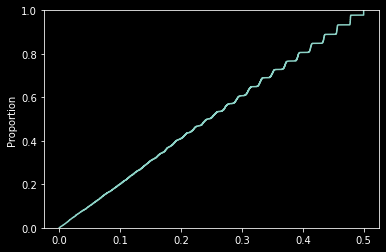

In [ ]:
sns.ecdfplot(t)

In [ ]:
(t < 0.05).mean()

0.1012

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

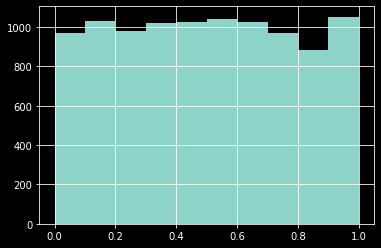

In [ ]:
t.hist()

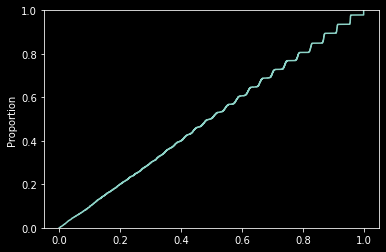

In [ ]:
sns.ecdfplot(t)

In [ ]:
(t < 0.05).mean()

0.0504

# Сэмплы в питоне

https://colab.research.google.com/drive/10DkHtLXsRHYSB7f5LMV5h5WW__uTcNHE?usp=sharing

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))

In [ ]:
sample_size

1092

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.797

1/3

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size1 = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/3))

In [ ]:
sample_size1

2184

In [ ]:
sample_size2 = round(sample_size1 * 1/3)

In [ ]:
sample_size2

728

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size1)
  b = np.random.binomial(1,baseline + mde,size=sample_size2)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.8023

In [ ]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

0.789

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.30, 0.32)
sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

8392.38536140766

In [ ]:
# 0.2 , 0.25 | разница была

In [ ]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append((1,pval))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
t

,y_true,y_score,y_pred
0,1,5.923651e-03,1
1,1,2.588389e-04,1
2,1,4.717968e-01,0
3,1,1.552739e-04,1
4,1,1.057492e-02,1
...,...,...,...
995,1,1.759710e-01,0
996,1,5.112664e-08,1
997,1,4.609330e-03,1
998,1,1.395371e-04,1


In [ ]:
t['y_pred'].mean()

0.799

In [ ]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append((0,pval))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
t

,y_true,y_score,y_pred
0,0,0.827040,0
1,0,0.471170,0
2,0,0.906206,0
3,0,0.761551,0
4,0,0.672519,0
...,...,...,...
995,0,0.614709,0
996,0,0.523922,0
997,0,0.039920,1
998,0,0.146885,0


In [ ]:
t['y_pred'].mean()

0.05

In [ ]:
sample_size = 1090
baseline = 0.2
mde = 0.05
result = []
class_balance = 0.5
for _ in tqdm(range(10000)):
  if np.random.binomial(1,class_balance):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((0,pval))
  else:
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((1,pval))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
t['y_true'].mean()

0.5022

In [ ]:
t

,y_true,y_score,y_pred
0,1,0.136483,0
1,0,0.591706,0
2,1,0.014750,1
3,0,0.230490,0
4,1,0.000427,1
...,...,...,...
9995,1,0.043663,1
9996,1,0.019188,1
9997,0,0.258766,0
9998,0,0.915435,0


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4978
           1       0.94      0.80      0.86      5022

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [ ]:
t[t['y_pred'] == 1]['y_true'].mean()

0.937995337995338

Изменим баланс классов

In [ ]:
sample_size = 1090
baseline = 0.2
mde = 0.05
result = []
class_balance = 0.95
for _ in tqdm(range(10000)):
  if np.random.binomial(1,class_balance):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((0,pval))
  else:
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((1,pval))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [ ]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [ ]:
t['y_true'].mean()

0.0504

In [ ]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9496
           1       0.47      0.80      0.59       504

    accuracy                           0.94     10000
   macro avg       0.73      0.88      0.78     10000
weighted avg       0.96      0.94      0.95     10000



In [ ]:
t[t['y_pred'] == 1]['y_true'].mean()

0.4664351851851852

In [ ]:
t['y_pred'] = (t['y_score'] < 0.01)*1

In [ ]:
t['y_true'].mean()

0.0504

In [ ]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9496
           1       0.76      0.57      0.65       504

    accuracy                           0.97     10000
   macro avg       0.87      0.78      0.82     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
t[t['y_pred'] == 1]['y_true'].mean()

0.7592592592592593

https://vkteam.medium.com/practitioners-guide-to-statistical-tests-ed2d580ef04f